In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
train_data = np.load('data0.npy')
train_labels = np.load('lab0.npy')
train_data = train_data / 255.0
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 53.3168 - mean_absolute_error: 5.6805 - val_loss: 28.9168 - val_mean_absolute_error: 4.3508
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 26.6198 - mean_absolute_error: 4.1472 - val_loss: 27.1237 - val_mean_absolute_error: 4.1924
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 21.9838 - mean_absolute_error: 3.7748 - val_loss: 25.8808 - val_mean_absolute_error: 4.0893
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 19.3296 - mean_absolute_error: 3.5165 - val_loss: 26.7597 - val_mean_absolute_error: 4.1718
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 17.4148 - mean_absolute_error: 3.3467 - val_loss: 25.3449 - val_mean_absolute_error: 4.0405
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 14.7523 - mean_absolute_error: 3.0575 - val_loss: 26.0107 - val_mean_absolute_error: 4.0965
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 13.0069

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 28.5257 - mean_absolute_error: 4.3254


Validation Loss: 28.49269676208496, Validation MAE: 4.314751625061035
Saving model


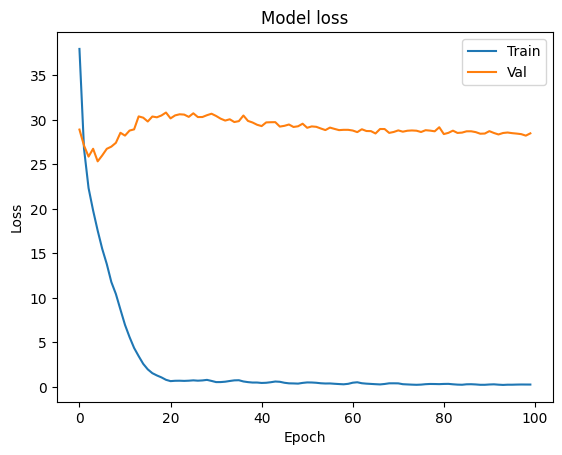

In [9]:
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)), MaxPooling2D((2, 2)), Flatten(), Dense(128, activation='relu'), Dense(1) ])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)
model.save('preliminary_cnn_model.h5')
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation MAE: {val_mae}")
print("Saving model")
model.save('preliminary_cnn_model.h5')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()